## Overview

### Create a Time-Series Model Using the Craigslist Vehicles Dataset available on [Kaggle](https://www.kaggle.com/datasets/mbaabuharun/craigslist-vehicles) following the approach outlined below
.
Here are the key steps

* Start by addressing missing values in the dataset. You can handle this by filling in missing values with the median for numerical columns and the mode for categorical columns.
* Ensure that the data types of the columns are appropriate. Specifically, make sure to convert the 'posting_date' column to a datetime data type.
* Utilize the 'posting_date' column to create a datetime index for the dataset. This will facilitate the analysis of temporal patterns.
* With clean data, explore it using various visualizations and statistical analysis techniques. This step is crucial for understanding temporal patterns, identifying seasonal trends, and analyzing demand-supply dynamics by region and vehicle type.
* Build the time-series chart.
* Finally, create a GitHub Repository and push your work there, also document your process through each of the steps and demonstrate your understanding by implementing them on the dataset.

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load dataset
data = pd.read_csv("craigslist_vehicles.csv")
data.head(3)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00


In [8]:
#checking  missing values in the dataset
data.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

The number of missing values is extreme for dropping thus,they'll be replaced with zero

In [10]:
#replace null values with 0
data.fillna(0, inplace=True)

In [11]:
#confirm
data.isnull().sum()

Unnamed: 0      0
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
county          0
state           0
lat             0
long            0
posting_date    0
removal_date    0
dtype: int64

In [12]:
#check data types
data.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
removal_date     object
dtype: object

In [13]:
#next step:make sure to convert the 'posting_date' column to a datetime data type.
def custom_date_parser(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S%z')
    except:
        return pd.NaT

data['posting_date'] = data['posting_date'].apply(custom_date_parser)

In [8]:
#call for confirmation
data["posting_date"]

0        2021-04-16 00:00:00+00:00
1        2021-04-24 00:00:00+00:00
2        2021-04-23 00:00:00+00:00
3        2021-04-16 00:00:00+00:00
4        2021-04-24 00:00:00+00:00
                    ...           
426875   2021-04-15 00:00:00+00:00
426876   2021-04-30 00:00:00+00:00
426877   2021-04-30 00:00:00+00:00
426878   2021-05-03 00:00:00+00:00
426879   2021-04-17 00:00:00+00:00
Name: posting_date, Length: 426880, dtype: datetime64[ns, UTC]

In [14]:
#Utilize the 'posting_date' column to create a datetime index for the dataset. This will facilitate the analysis of temporal patterns.
data['posting_date'] = pd.to_datetime(data['posting_date'], format='%Y-%m-%d %H:%M:%S%z')
data.set_index('posting_date', inplace=True)

### EDA 
* Showing the correlation btwn some of the columns to show the patterns and trends in the dataset

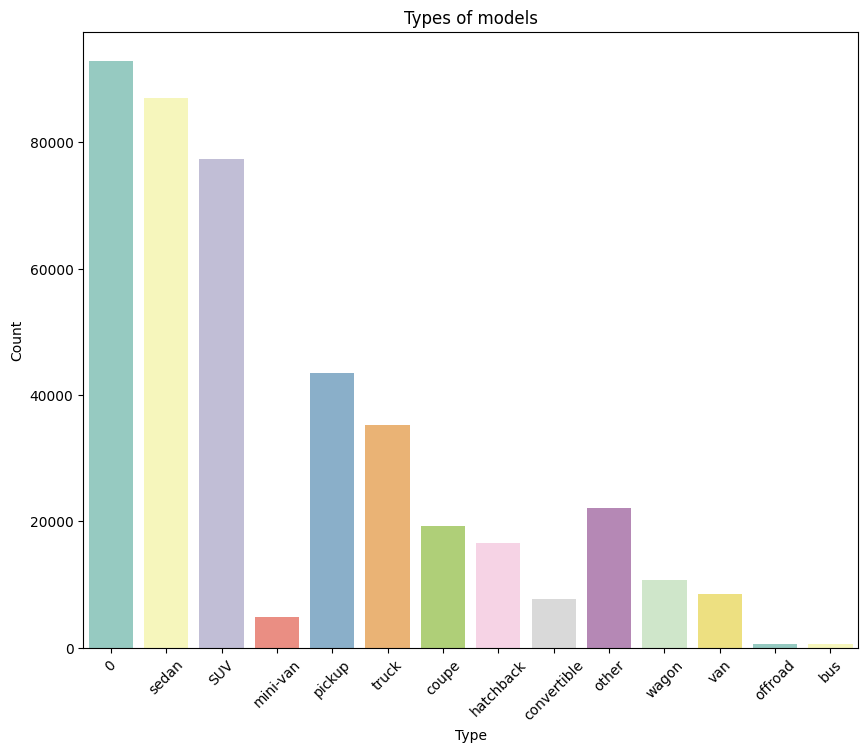

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Types of models")

sns.countplot(data=data, x='type', hue='type', palette="Set3", legend=False)  

plt.xlabel("Type")
plt.ylabel("Count")


plt.xticks(rotation=45)

plt.show()


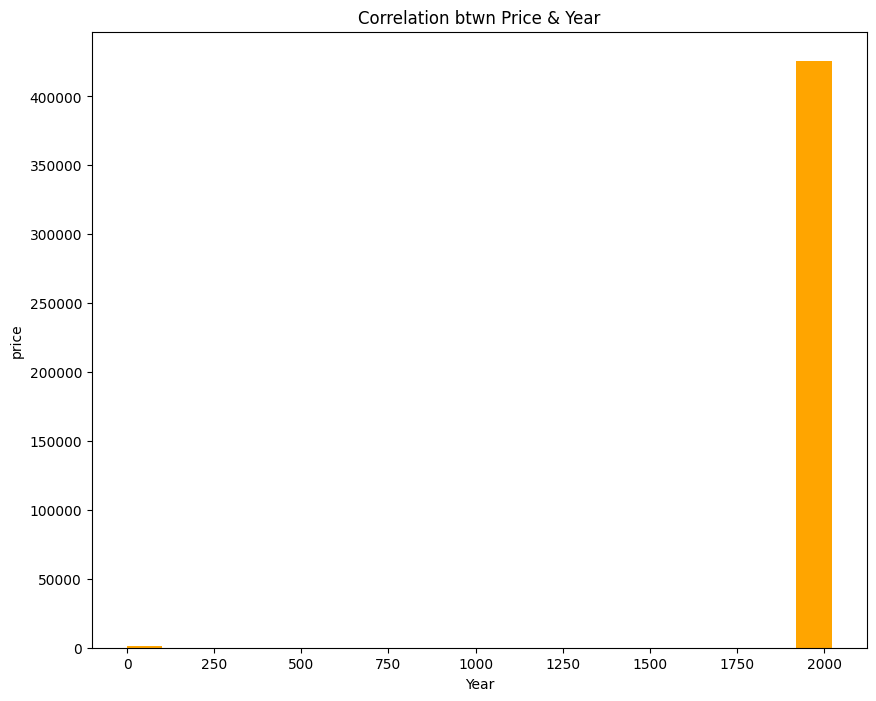

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Correlation btwn Price & Year")

data['year'].plot(kind="hist", color="orange", bins=20) 
#the axes
plt.xlabel("Year")
plt.ylabel("price")

plt.show()

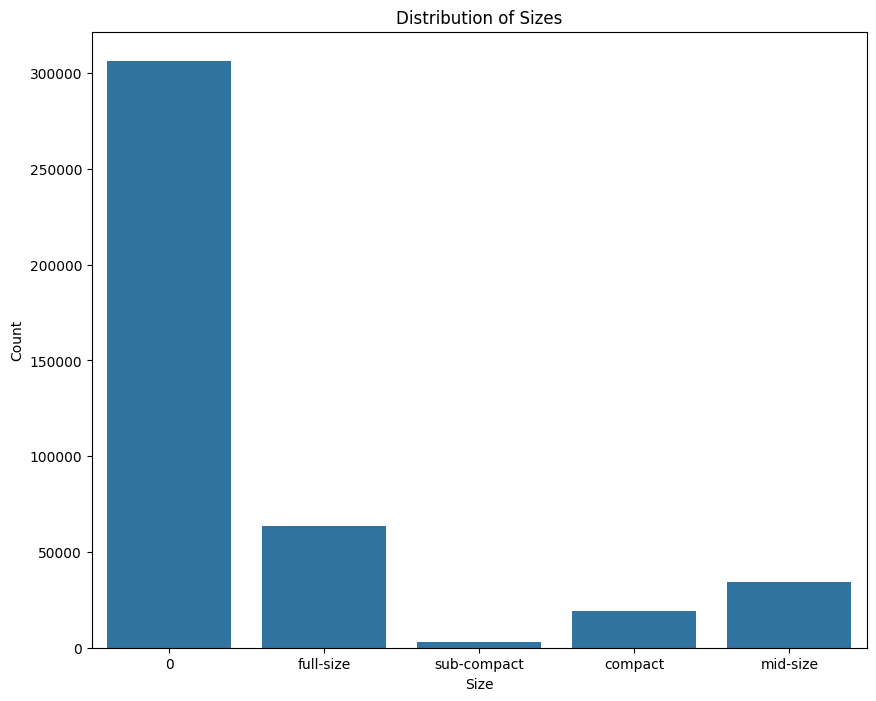

In [18]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Sizes")

sns.countplot(data=data, x='size') 

plt.xlabel("Size")
plt.ylabel("Count")

plt.show()


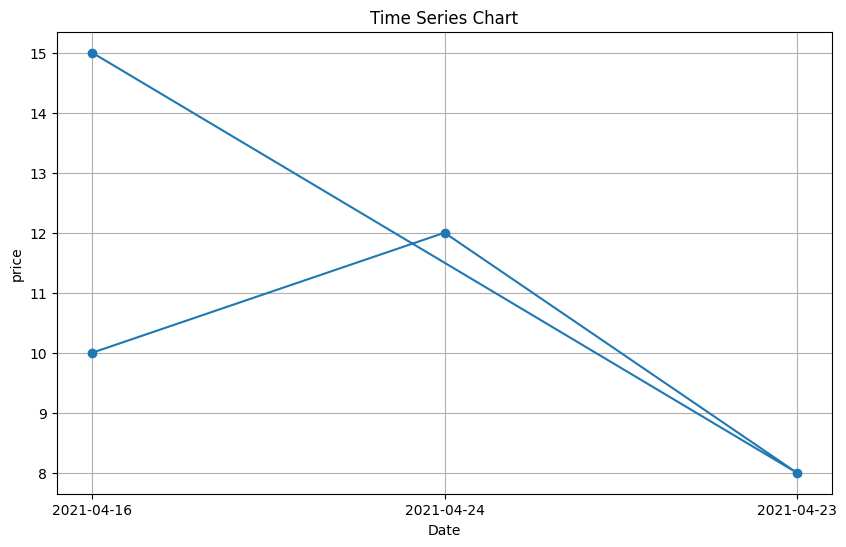

In [23]:
#Build the time-series chart.
data = {
    'posting_date': ['2021-04-16', '2021-04-24', '2021-04-23', '2021-04-16'],
    'price': [10, 12, 8, 15]
}
df = pd.DataFrame(data)

# Set the 'posting_date' column as the index
df.set_index('posting_date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], marker='o', linestyle='-')
plt.title('Time Series Chart')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid(True)
plt.show()


The chart is showing how the price fluctuated over the specified dates, showing trends and variations in the data over time.

### Conclusions:

* Trend Observation: The time series chart demonstrates price fluctuations over the specified time period, which is important to monitor and understand.

* Anomaly Detection: Notably, there was a sharp increase in price from 10 to 15 on April 16, 2021, followed by fluctuations, including a drop to 8 on April 23, 2021. These fluctuations suggest anomalies or unusual events during this time.



### Recommendations
* Continuous Monitoring on price over time to identify and respond to trends or anomalies promptly.